In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


In [16]:
# Load training and testing data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')


In [17]:
df_train.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [4]:
df_test.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


EDA

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [6]:
df_train.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [7]:
df_train.dtypes.value_counts()

int64      6
object     4
float64    3
dtype: int64

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39098 non-null  int64  
 1   person_age                  39098 non-null  int64  
 2   person_income               39098 non-null  int64  
 3   person_home_ownership       39098 non-null  object 
 4   person_emp_length           39098 non-null  float64
 5   loan_intent                 39098 non-null  object 
 6   loan_grade                  39098 non-null  object 
 7   loan_amnt                   39098 non-null  int64  
 8   loan_int_rate               39098 non-null  float64
 9   loan_percent_income         39098 non-null  float64
 10  cb_person_default_on_file   39098 non-null  object 
 11  cb_person_cred_hist_length  39098 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.6+ MB


In [9]:
df_test.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,39098.000000,39098.000000,3.909800e+04,39098.000000,39098.000000,39098.000000,39098.000000,39098.000000
mean,78193.500000,27.566781,6.406046e+04,4.687068,9251.466188,10.661216,0.159573,5.830707
std,11286.764749,6.032761,3.795583e+04,3.868395,5576.254680,3.020220,0.091633,4.072157
min,58645.000000,20.000000,4.000000e+03,0.000000,700.000000,5.420000,0.000000,2.000000
25%,68419.250000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000
50%,78193.500000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000
75%,87967.750000,30.000000,7.588500e+04,7.000000,12000.000000,12.990000,0.210000,8.000000
max,97742.000000,94.000000,1.900000e+06,42.000000,35000.000000,22.110000,0.730000,30.000000


Target Variable Distribution

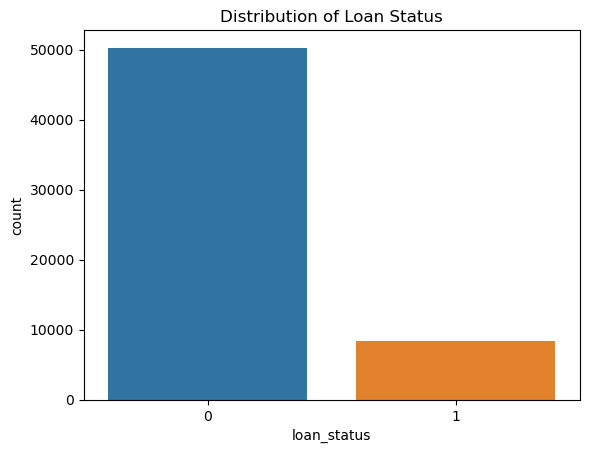

0    0.857618
1    0.142382
Name: loan_status, dtype: float64


In [18]:
# Target Variable Distribution
sns.countplot(x='loan_status', data=df_train)
plt.title('Distribution of Loan Status')
plt.show()

# If loan_status is imbalanced, consider displaying the ratio
loan_status_counts = df_train['loan_status'].value_counts(normalize=True)
print(loan_status_counts)


The class distribution of the target variable loan_status appears to be somewhat imbalanced, with more instances of loans being approved (loan_status = 1) compared to denied (loan_status = 0). 

Numerical Feature Analysis

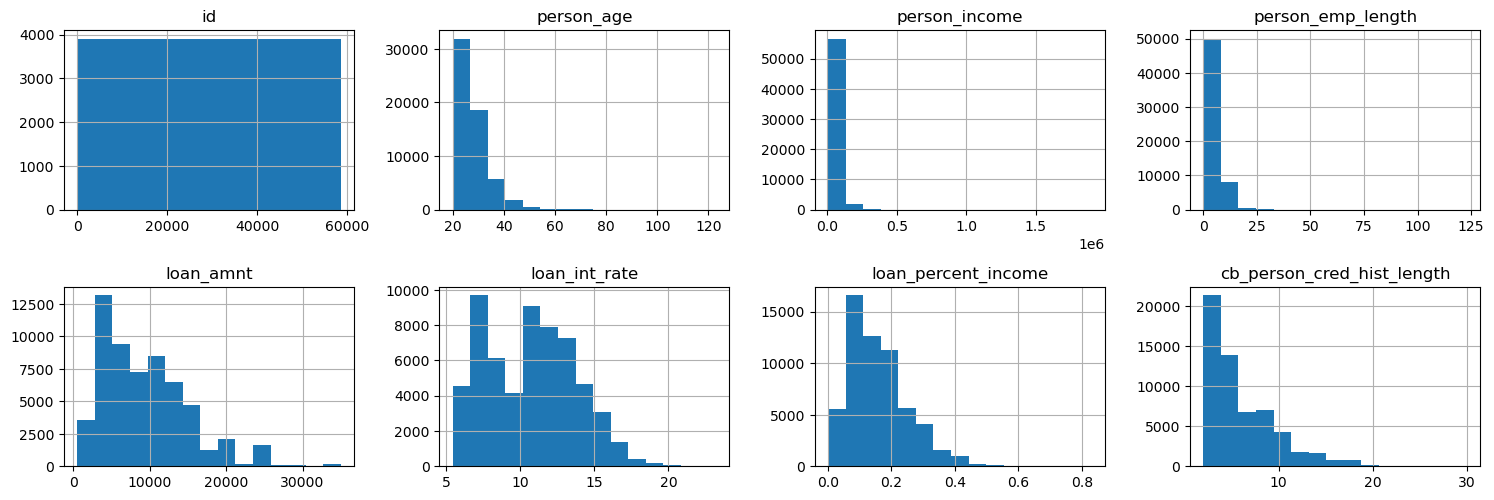

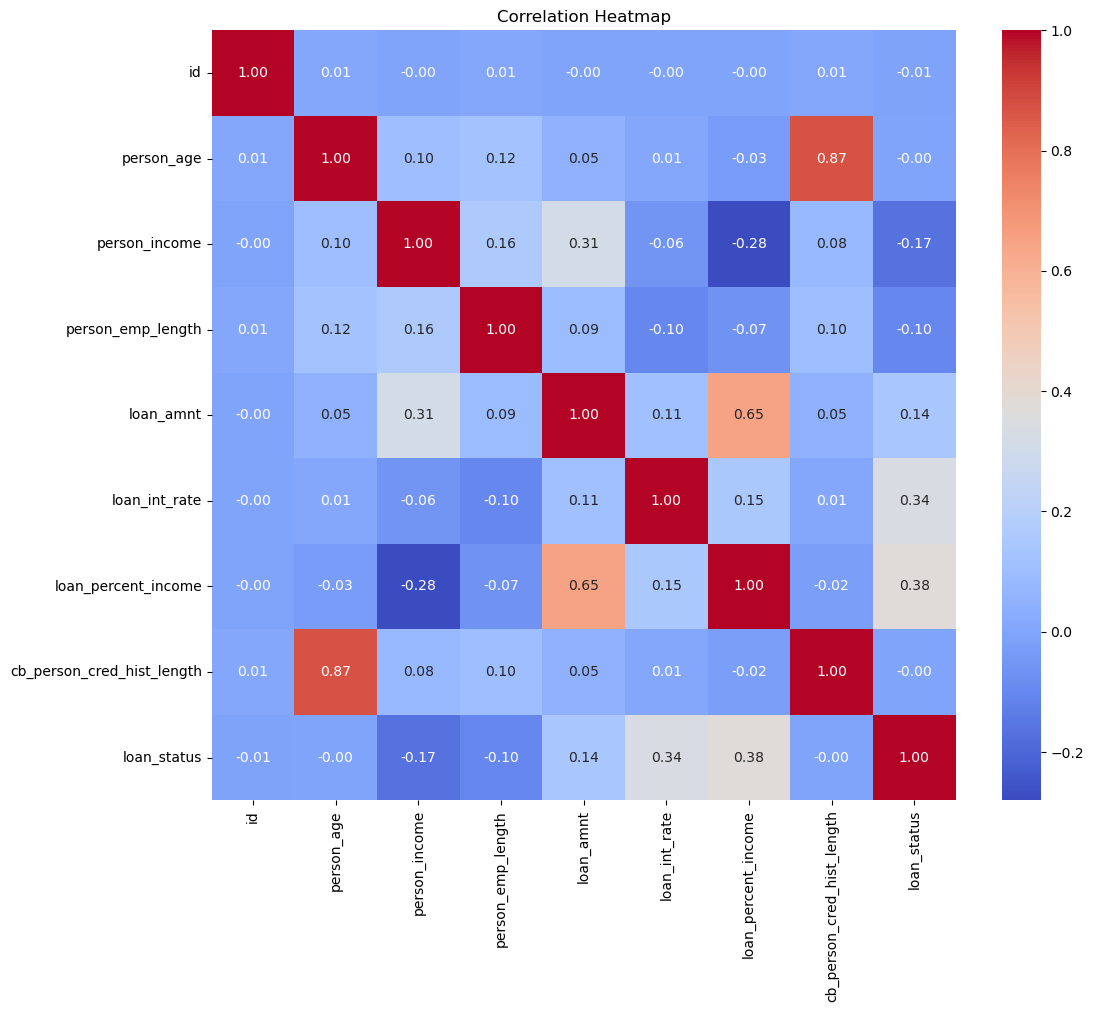

In [19]:
# Identify numerical columns
numerical_cols = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('loan_status')  # Assuming 'loan_status' is the target

# Histograms for numerical features
df_train[numerical_cols].hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_train[numerical_cols + ['loan_status']].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Categorical Features Analysis

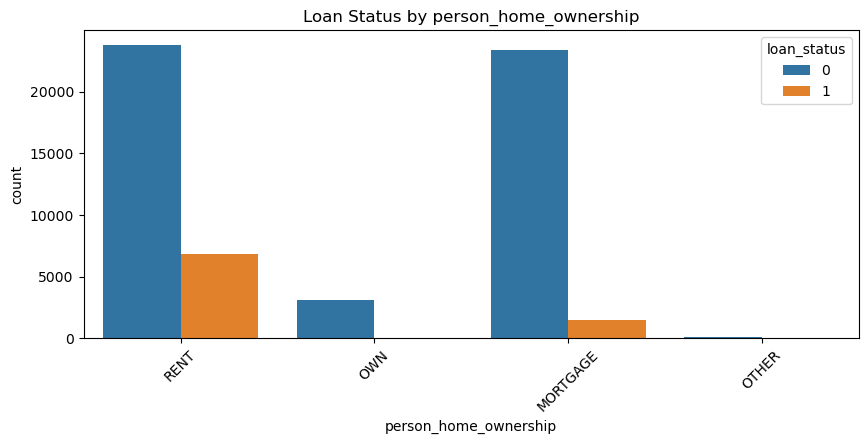

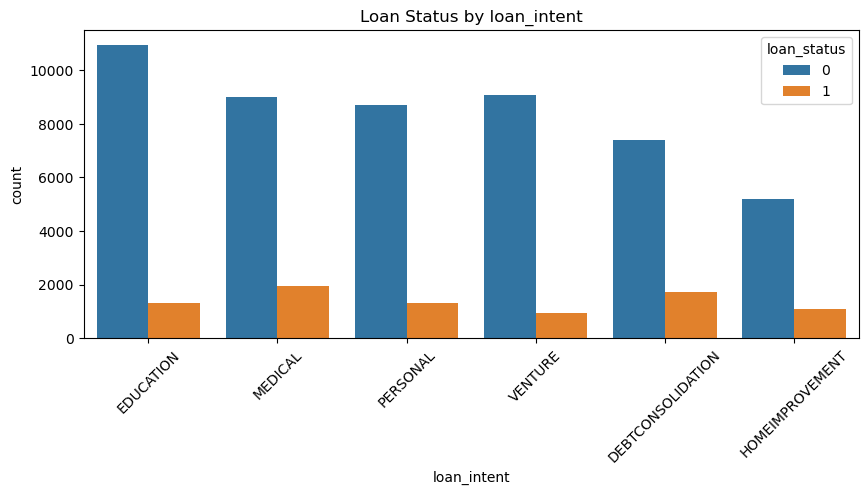

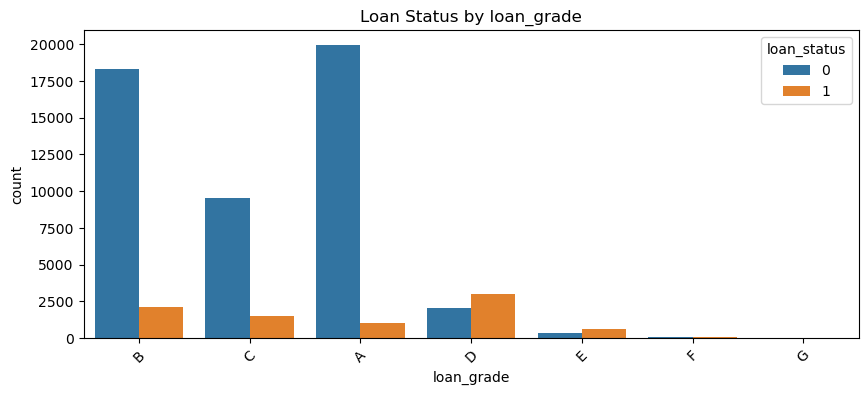

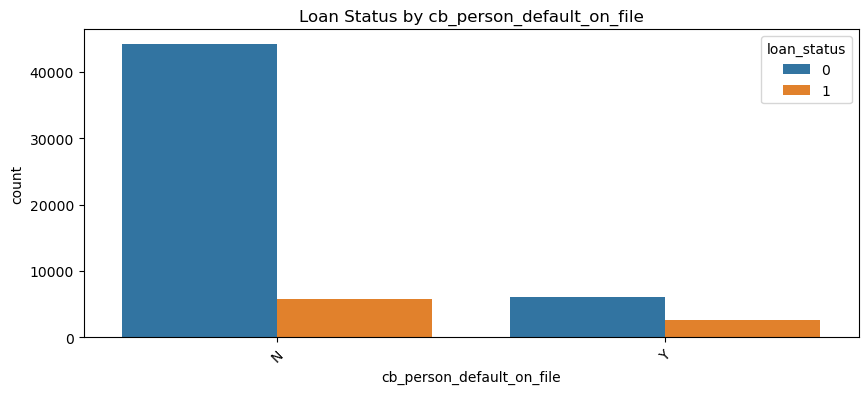

In [20]:
# Identify categorical columns
categorical_cols = df_train.select_dtypes(include=['object']).columns.tolist()

# Count plots for categorical features
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, hue='loan_status', data=df_train)
    plt.title(f'Loan Status by {col}')
    plt.xticks(rotation=45)
    plt.show()


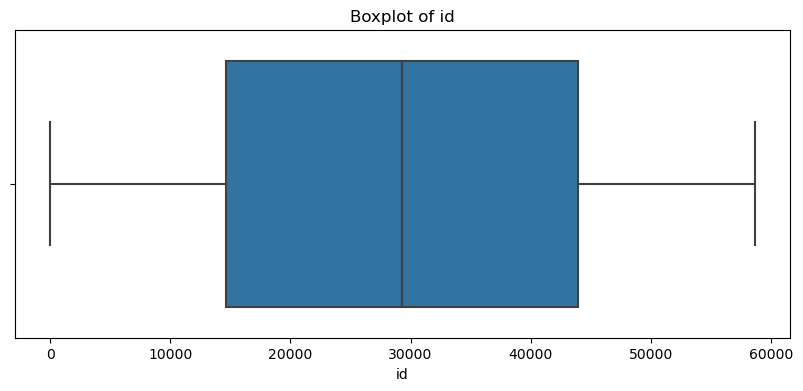

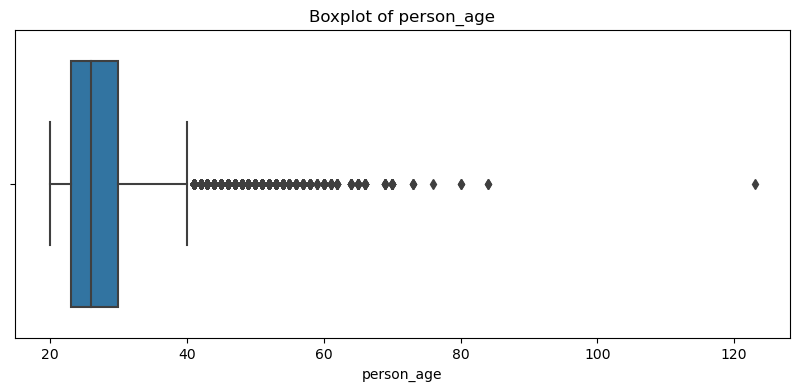

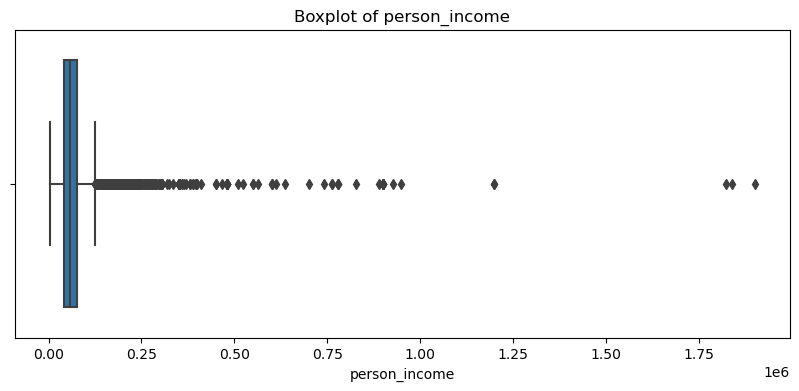

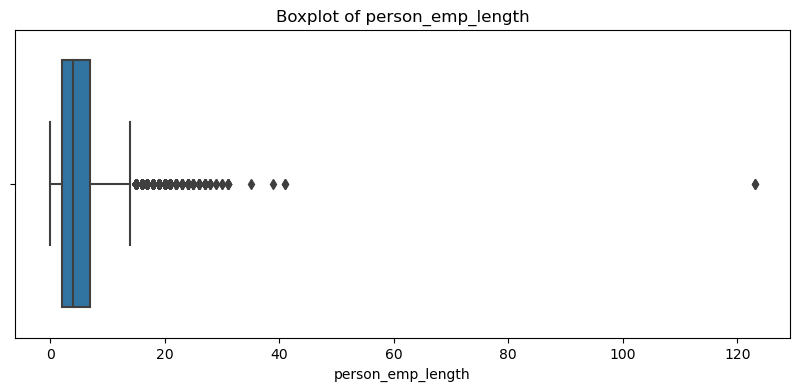

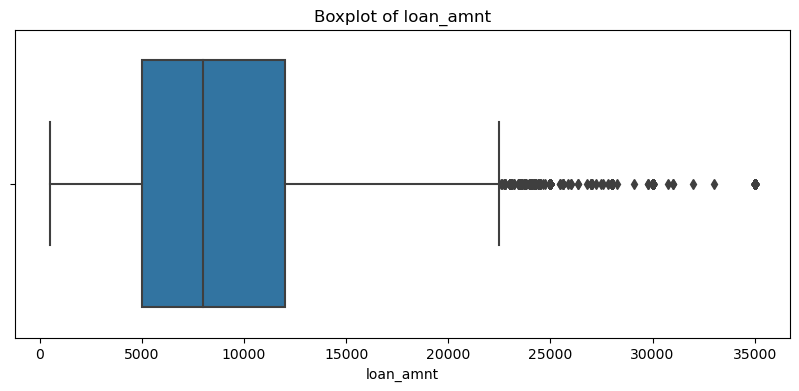

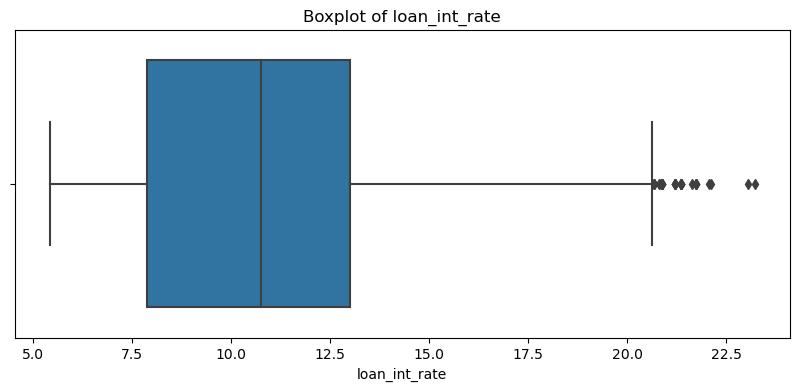

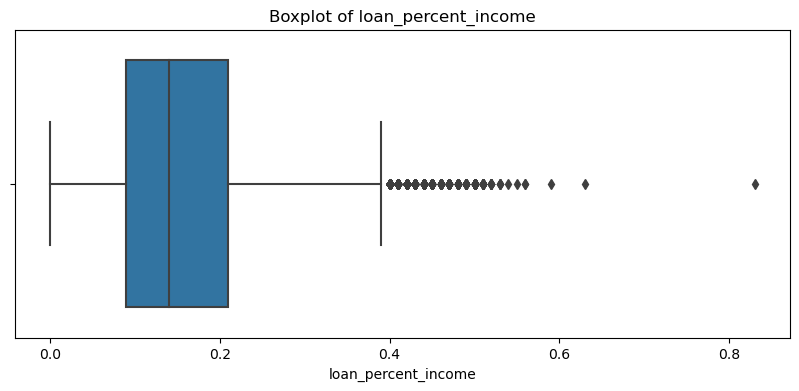

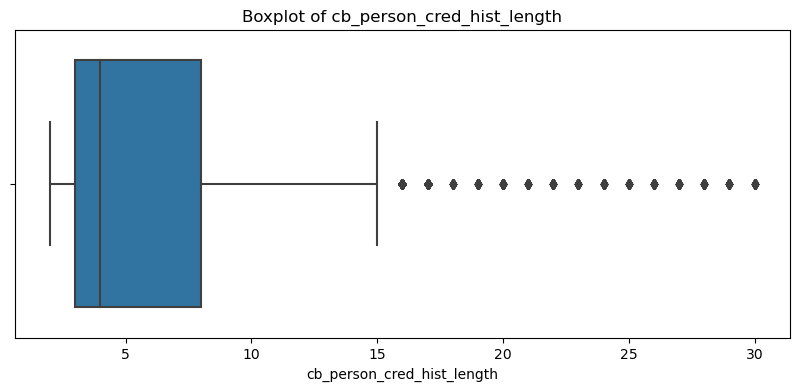

In [21]:
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df_train[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [22]:
numerical_features =df_train.select_dtypes(exclude=["object"]).columns.tolist()

def detect_outliers(df, column):
    Q1 = np.quantile(df[column], 0.25)
    Q3 = np.quantile(df[column], 0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - (1.5 * IQR)
    upper_limit = Q3 + (1.5 * IQR)
    
    return df[(df[column] < lower_limit) | (df[column] > upper_limit)]

for feat in numerical_features:
    outliers = detect_outliers(df_train, feat)
    print(f"Outliers in column {feat}: {outliers.shape[0]}")

Outliers in column id: 0
Outliers in column person_age: 2446
Outliers in column person_income: 2411
Outliers in column person_emp_length: 1274
Outliers in column loan_amnt: 2045
Outliers in column loan_int_rate: 34
Outliers in column loan_percent_income: 1210
Outliers in column cb_person_cred_hist_length: 1993
Outliers in column loan_status: 8350


Preprocessing the Data

In [23]:
# Label Encoding for binary categorical features
binary_cols = [col for col in categorical_cols if df_train[col].nunique() == 2]

label_encoder = LabelEncoder()
for col in binary_cols:
    df_train[col] = label_encoder.fit_transform(df_train[col])
    df_test[col] = label_encoder.transform(df_test[col])

In [25]:
# One-Hot Encoding for other categorical features
multi_cols = [col for col in categorical_cols if df_train[col].nunique() > 2]

train = pd.get_dummies(df_train, columns=multi_cols, drop_first=True)
test = pd.get_dummies(df_test, columns=multi_cols, drop_first=True)

# Align train and test to have the same dummy variables
train, test = train.align(test, join='left', axis=1, fill_value=0)

In [26]:
scaler = StandardScaler()
train[numerical_cols] = scaler.fit_transform(train[numerical_cols])
test[numerical_cols] = scaler.transform(test[numerical_cols])

Modeling

In [27]:
# Define features and target
X = train.drop(['id', 'loan_status'], axis=1)
y = train['loan_status']

# Ensure test set has the same features as training set
X_test = test.drop(['id'], axis=1)

# Split into training and validation sets (optional but recommended)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Initialize the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict probabilities
y_pred_proba = rf.predict_proba(X_val)[:, 1]

# Evaluate
auc = roc_auc_score(y_val, y_pred_proba)
print(f"Validation AUC-ROC: {auc:.4f}")

Validation AUC-ROC: 0.9322


In [29]:
from sklearn.metrics import f1_score

# Predict class labels (not probabilities)
y_pred = rf.predict(X_val)

# Calculate F1 score
f1 = f1_score(y_val, y_pred)
print(f"Validation F1 Score: {f1:.4f}")

Validation F1 Score: 0.8049


In [31]:
!pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 5.3 MB/s eta 0:00:00a 0:00:01


In [36]:
from imblearn.over_sampling import SMOTE

# SMOTE 적용 (훈련 데이터에만 적용)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 모델 다시 훈련 (SMOTE 적용 후)
rf.fit(X_train_res, y_train_res)

# 검증 세트로 예측 (검증 세트는 SMOTE 적용하지 않음)
y_pred = rf.predict(X_val)
y_pred_proba = rf.predict_proba(X_val)[:, 1]

# AUC-ROC 계산
auc = roc_auc_score(y_val, y_pred_proba)
print(f"Validation AUC-ROC: {auc:.4f}")

# F1 Score 계산
f1 = f1_score(y_val, y_pred)
print(f"Validation F1 Score: {f1:.4f}")

Validation AUC-ROC: 0.9333
Validation F1 Score: 0.7869
